This program will print a table and plot a bar-chart.

This script depends on the following packages:

- pandas
- numpy
- seaborn
- matplotlib
- tabulate

You may install each using *pip*/*PyPI* (or using whatever IDE function is available to search and install packages). You may also install the complete set of requirements using the *requirements.txt* file included as part of this project:

    sudo pip install -r requirements.txt

The following is a walkthrough of the code.

Do the imports. Note that we add "inline" to the *matplotlib* import so that the graphics end-up in the notebook:

In [1]:
# Tell ipython to load the matplotlib environment.
%matplotlib inline

import itertools

import pandas
import numpy
import seaborn
import matplotlib.pyplot
import tabulate

Set configurables:

In [2]:
_DATA_FILEPATH = 'datagovdatasetsviewmetrics.csv'
_ROTATION_DEGREES = 90
_BOTTOM_MARGIN = 0.35
_COLOR_THEME = 'coolwarm'
_LABEL_X = 'Organizations'
_LABEL_Y = 'Views'
_TITLE = 'Organizations with Most Views'
_ORGANIZATION_COUNT = 10
_MAX_LABEL_LENGTH = 20

We use *[pandas](http://pandas.pydata.org)* to read, group, and sort our data:

In [3]:
def read_data():
    d = pandas.read_csv(_DATA_FILEPATH)

    return d
    
def process_data(d):
    # Group by organization.

    def sum_views(df):
        return sum(df['Views per Month'])

    g = d.groupby('Organization Name').apply(sum_views)

    # Sort by views (descendingly).

    g.sort(ascending=False)

    # Grab the first N to plot.

    items = g.iteritems()
    s = itertools.islice(items, 0, _ORGANIZATION_COUNT)

    s = list(s)

    # Sort them in ascending order, this time, so that the larger ones are on 
    # the right (in red) in the chart. This has a side-effect of flattening the 
    # generator while we're at it.
    s = sorted(s, key=lambda (n, v): v)

    # Truncate the names (otherwise they're unwieldy).

    distilled = []
    for (name, views) in s:
        if len(name) > (_MAX_LABEL_LENGTH - 3):
            name = name[:17] + '...'

        distilled.append((name, views))

    return distilled

Use the *[tabulate](https://pypi.python.org/pypi/tabulate)* library to render a nice table. This is one of my most favorite Python tools:

In [4]:
def print_table(distilled):
    headings = ['Organization', 'Views']
    print(tabulate.tabulate(distilled, headers=headings))

Use *[seaborn](http://stanford.edu/~mwaskom/software/seaborn)* (one of the nicest chart-libraries for Python) to make a bar-chart. Notice that *pandas* is just a layer around *[numpy](http://www.numpy.org/)*.

In [5]:
def plot_chart(distilled):
    # Split the series into separate vectors of labels and values.

    labels_raw = []
    values_raw = []
    for (name, views) in distilled:
        labels_raw.append(name)
        values_raw.append(views)

    labels = numpy.array(labels_raw)
    values = numpy.array(values_raw)

    # Create one plot.

    seaborn.set(style="white", context="talk")

    (f, ax) = matplotlib.pyplot.subplots(1)

    b = seaborn.barplot(
        labels, 
        values,
        ci=None, 
        palette=_COLOR_THEME, 
        hline=0, 
        ax=ax,
        x_order=labels)

    # Set labels.

    ax.set_title(_TITLE)
    ax.set_xlabel(_LABEL_X)
    ax.set_ylabel(_LABEL_Y)

    # Rotate the x-labels (otherwise they'll overlap). Seaborn also doesn't do 
    # very well with diagonal labels so we'll go vertical.
    b.set_xticklabels(labels, rotation=_ROTATION_DEGREES)

    # Add some margin to the bottom so the labels aren't cut-off.
    matplotlib.pyplot.subplots_adjust(bottom=_BOTTOM_MARGIN)

Run the program:

Organization            Views
--------------------  -------
General Services ...    21144
Earth Data Analys...    25857
Department of Edu...    27300
Department of Tra...    27865
Department of Def...    28536
U.S. Department o...    41642
Department of Agr...    47002
U.S. Geological S...    66755
National Oceanic ...    82959
US Census Bureau,...    97789


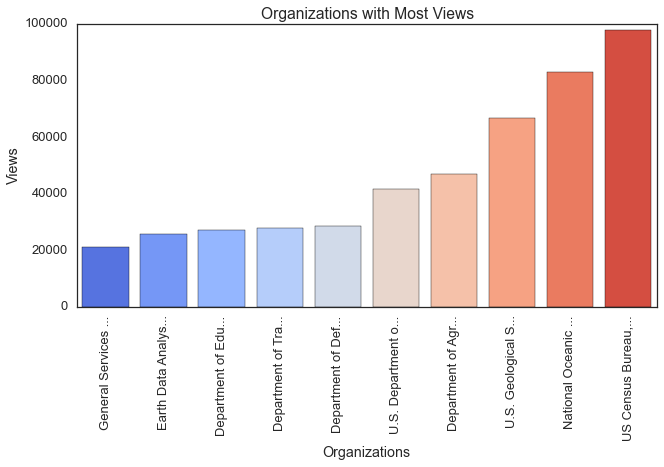

In [6]:
df = read_data()
distilled = process_data(df)

print_table(distilled)
plot_chart(distilled)